In [168]:
import pandas as pd
import numpy as np
#pd.set_option('max_columns', 120)
#pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.rcParams['figure.figsize'] = (12,8)

In [169]:
loans = pd.read_csv('data/lending_club_loans.csv', skiprows=1,low_memory=False)

In [170]:
loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [171]:
# to Know columns and Row 
loans.shape



(42538, 115)

In [172]:
# Drop any columns more then 50% missing value 
half_count=len(loans)/2
loans=loans.dropna(thresh=half_count,axis=1)

In [173]:
loans.shape

(42538, 58)

In [174]:
# know all columns name 
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bank

In [175]:
Data_Dict=pd.read_csv('data/LCDataDictionary.csv')

In [176]:
Data_Dict.shape


(116, 2)

In [177]:
Data_Dict.style.set_properties(subset=['description'], **{'width': '1000px'})

,loanstatnew,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [178]:
Data_Dict.loc[Data_Dict['loanstatnew']== 'desc']

,loanstatnew,description
15,desc,Loan description provided by the borrower


In [179]:
Data_Dict.loc[Data_Dict['loanstatnew']== 'url']

,loanstatnew,description
111,url,URL for the LC page with listing data.


In [180]:
#drop columns and URL
loans=loans.drop(['url','desc'],axis=1)

In [181]:
loans.shape

(42538, 56)

In [182]:
loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [183]:
loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['loanstatnew'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['loanstatnew','dtypes']]
loans_dtypes['first value'] = loans.loc[0].values
preview = loans_dtypes.merge(Data_Dict, on='loanstatnew',how='left')

In [184]:
preview.head()

,loanstatnew,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...


In [185]:
preview[:20]

,loanstatnew,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975,The total amount committed by investors for th...
5,term,object,36 months,The number of payments on the loan. Values are...
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if th...
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [186]:
drop_list = ['id','member_id','sub_grade','emp_title','issue_d']
loans = loans.drop(drop_list,axis=1)

In [187]:
loans.shape

(42538, 51)

In [188]:
preview[19:38]

,loanstatnew,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided b...
21,addr_state,object,AZ,The state provided by the borrower in the loan...
22,dti,float64,27.65,A ratio calculated using the borrower’s total ...
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of ...
24,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported cre...
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO a...
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO a...
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excl...
28,open_acc,float64,3,The number of open credit lines in the borrowe...


In [189]:
drop_cols = [ 'zip_code','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv']
loans = loans.drop(drop_cols, axis=1)

In [190]:
preview[38:]

,loanstatnew,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-2015,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for thi...
46,last_fico_range_high,float64,744,The upper boundary range the borrower’s last F...
47,last_fico_range_low,float64,740,The lower boundary range the borrower’s last F...


In [191]:
#drop_cols = ['total_rec_prncp','total_rec_int',
#'total_rec_late_fee','recoveries',
#'collection_recovery_fee', 'last_pymnt_d'
#]
#loans = loans.drop(drop_cols, axis=1)

In [192]:
#remove columns with only one value 
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

In [193]:
#remove value count that appear fewer than 4 times
for col in loans.columns:
    if (len(loans[col].unique()) < 4):
     print(loans[col].value_counts())
     print()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

n    42534
y        1
Name: pymnt_plan, dtype: int64

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

0.0    42429
1.0        1
Name: tax_liens, dtype: int64



In [194]:
#Drop skewed columns 
drop_cols = ['pymnt_plan','acc_now_delinq',
'tax_liens']
loans = loans.drop(drop_cols, axis=1)

In [195]:
#Handling Missing Value 
nullCount=loans.isnull().sum()
print("Null value in columns :\n{}".format(nullCount)) 

Null value in columns :
loan_amnt                     3
funded_amnt                   3
funded_amnt_inv               3
term                          3
int_rate                      3
installment                   3
grade                         3
emp_length                 1115
home_ownership                3
annual_inc                    7
verification_status           3
loan_status                   3
purpose                       3
title                        16
addr_state                    3
dti                           3
delinq_2yrs                  32
earliest_cr_line             32
fico_range_low                3
fico_range_high               3
inq_last_6mths               32
open_acc                     32
pub_rec                      32
revol_bal                     3
revol_util                   93
total_acc                    32
total_rec_prncp               3
total_rec_int                 3
total_rec_late_fee            3
recoveries                    3
collection_recov

In [196]:
loans['emp_length'].fillna(0, inplace=True)   #New self - employed people fill their 'emp_length' as 0.
loans=loans.drop(['pub_rec_bankruptcies'],axis=1)

In [197]:
nullCount=loans.isnull().sum()
print("Null value in columns :\n{}".format(nullCount)) 

Null value in columns :
loan_amnt                   3
funded_amnt                 3
funded_amnt_inv             3
term                        3
int_rate                    3
installment                 3
grade                       3
emp_length                  0
home_ownership              3
annual_inc                  7
verification_status         3
loan_status                 3
purpose                     3
title                      16
addr_state                  3
dti                         3
delinq_2yrs                32
earliest_cr_line           32
fico_range_low              3
fico_range_high             3
inq_last_6mths             32
open_acc                   32
pub_rec                    32
revol_bal                   3
revol_util                 93
total_acc                  32
total_rec_prncp             3
total_rec_int               3
total_rec_late_fee          3
recoveries                  3
collection_recovery_fee     3
last_pymnt_d               86
last_pymnt_amnt 

In [198]:
# drop all rows with null values  
loans = loans.dropna()

In [199]:
loans.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                      0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pull_d         0
last_fico_rang

In [200]:
#save file after removing columns and null values 
loans.to_csv('data/filter_loans.csv',index=False)


In [201]:
loans_filter = pd.read_csv('data/filter_loans.csv', low_memory=False)

In [202]:
loans_filter.dtypes.value_counts()

float64    23
object     14
dtype: int64

In [203]:
#Select only object columns
object_columns_df = loans_filter.select_dtypes(include=['object'])
object_columns_df.iloc[0]

term                     36 months
int_rate                    10.65%
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_pymnt_d              Jan-2015
last_credit_pull_d        Sep-2016
Name: 0, dtype: object

In [204]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state','purpose','loan_status']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        20060
MORTGAGE    18917
OWN          3235
OTHER         134
NONE            4
Name: home_ownership, dtype: int64 

grade :
B    12355
A    10163
C     8689
D     5975
E     3369
F     1292
G      507
Name: grade, dtype: int64 

verification_status :
Not Verified       18640
Verified           13434
Source Verified    10276
Name: verification_status, dtype: int64 

emp_length :
10+ years    9353
< 1 year     5017
2 years      4728
3 years      4351
4 years      3631
1 year       3571
5 years      3441
6 years      2366
7 years      1870
8 years      1585
9 years      1334
0            1103
Name: emp_length, dtype: int64 

term :
 36 months    31374
 60 months    10976
Name: term, dtype: int64 

addr_state :
CA    7398
NY    4045
FL    3093
TX    2896
NJ    1976
IL    1667
PA    1643
GA    1500
VA    1481
MA    1432
OH    1321
MD    1118
AZ     928
WA     886
CO     854
NC     827
CT     812
MI     794
MO     759
MN     648
NV     526
WI     514
SC     489
AL

In [205]:
#loans_filter['term'] = loans_filter['term'].str.split(' ').str[1]

In [206]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
#"grade":{
#"A": 6,
#"B": 5,
#"C": 4,
#"D": 3,
#"E": 2,
#"F": 1,
#"G": 0
#},
#"purpose":{
#"debt_consolidation":13,
#"credit_card":12,
#"home_improvement":11,
#"other":10,
#"major_purchase":9,
#"small_business":8,
#"car":7,
#"medical":6,
#"moving":5,
#"vacation":4,
#"house":3,
#"wedding":2,
#"renewable_energy":1,
#"educational":0
#},
"home_ownership":{
"MORTGAGE":5,
"RENT":4,
"OWN":3,
"OTHER":2,
"NONE":1,
},  
#"term":{
#"36":0,
#"60":1
#},  
"verification_status":{
"Verified":0,
"Source Verified":0,
"Not Verified":1
}   
}

In [207]:
loans_filter=loans_filter.replace(mapping_dict)

In [208]:
loans_filter.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,delinq_amnt
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,10,4,24000.0,...,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,0,4,30000.0,...,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,10,4,12252.0,...,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,10,4,49200.0,...,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,1,4,80000.0,...,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0


In [209]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line','last_pymnt_d']
loans_filter = loans_filter.drop(drop_cols,axis=1)

In [210]:
loans_filter['revol_util'] = loans_filter['revol_util'].str.rstrip('%').astype('float')

In [211]:
loans_filter['int_rate'] = loans_filter['int_rate'].str.rstrip('%').astype('float')

In [212]:
loans_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 32 columns):
loan_amnt                  42350 non-null float64
funded_amnt                42350 non-null float64
funded_amnt_inv            42350 non-null float64
term                       42350 non-null object
int_rate                   42350 non-null float64
installment                42350 non-null float64
grade                      42350 non-null object
emp_length                 42350 non-null object
home_ownership             42350 non-null int64
annual_inc                 42350 non-null float64
verification_status        42350 non-null int64
loan_status                42350 non-null object
purpose                    42350 non-null object
dti                        42350 non-null float64
delinq_2yrs                42350 non-null float64
fico_range_low             42350 non-null float64
fico_range_high            42350 non-null float64
inq_last_6mths             42350 non-null float64


In [213]:
loans_filter.to_csv('data/filter2_loans.csv',index=False)

In [214]:
#Quantitative Features

In [215]:
loans_filter_DV = pd.read_csv('data/filter2_loans.csv', low_memory=False)

In [216]:
loans_filter_DV.shape

(42350, 32)

In [217]:
loans_filter_DV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 32 columns):
loan_amnt                  42350 non-null float64
funded_amnt                42350 non-null float64
funded_amnt_inv            42350 non-null float64
term                       42350 non-null object
int_rate                   42350 non-null float64
installment                42350 non-null float64
grade                      42350 non-null object
emp_length                 42350 non-null int64
home_ownership             42350 non-null int64
annual_inc                 42350 non-null float64
verification_status        42350 non-null int64
loan_status                42350 non-null object
purpose                    42350 non-null object
dti                        42350 non-null float64
delinq_2yrs                42350 non-null float64
fico_range_low             42350 non-null float64
fico_range_high            42350 non-null float64
inq_last_6mths             42350 non-null float64
o

In [218]:
# find outliers and remove from features 

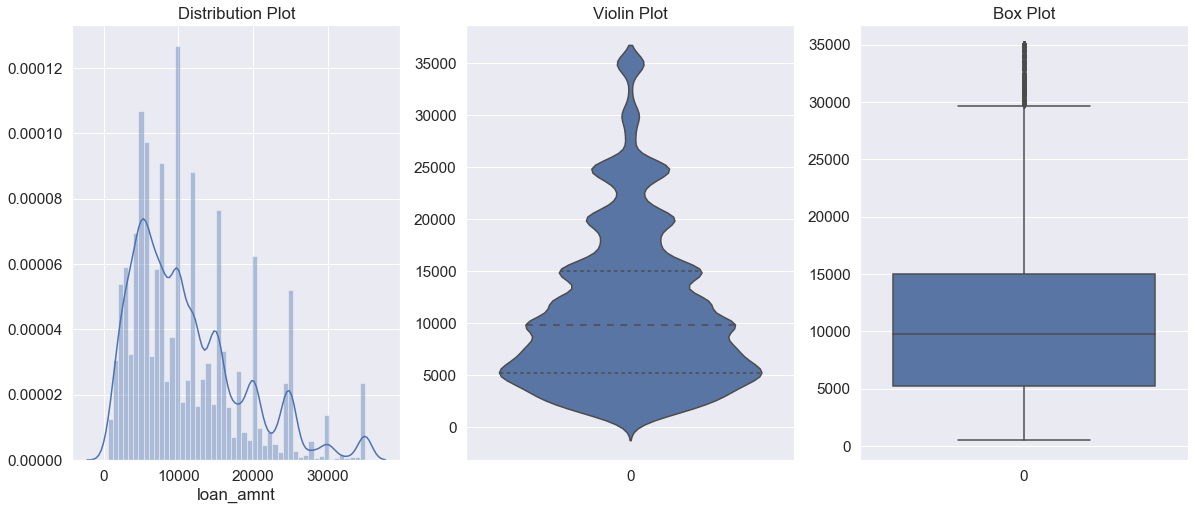

In [219]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loans_filter_DV["loan_amnt"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loans_filter_DV["loan_amnt"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loans_filter_DV["loan_amnt"],ax=ax[2],orient='v')
plt.show()

We can see that most of the loan amounts are distributed between<i> $5000 to $15000</i>.

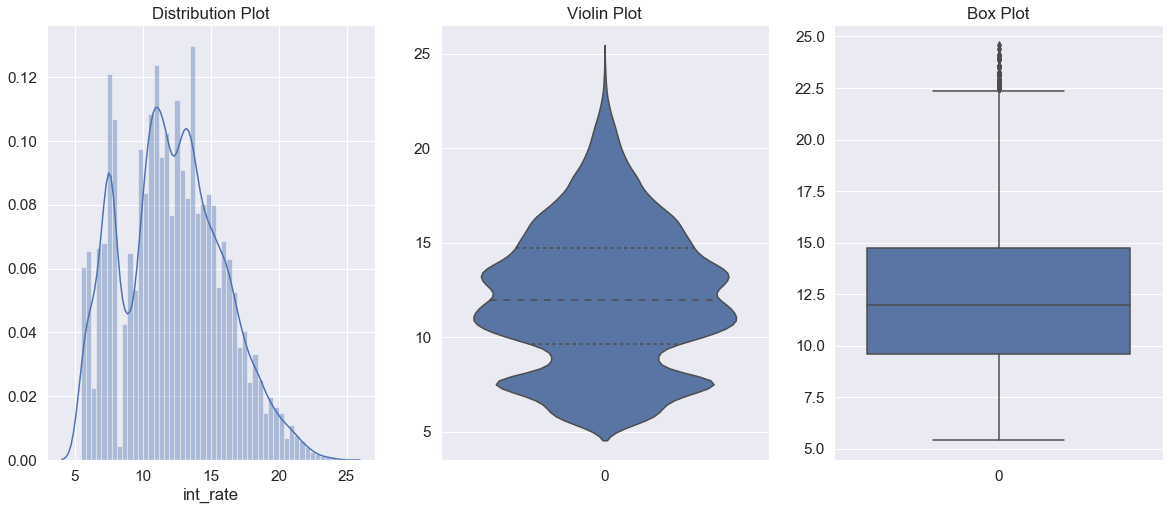

In [220]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loans_filter_DV["int_rate"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loans_filter_DV["int_rate"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loans_filter_DV["int_rate"],ax=ax[2],orient='v')
plt.show()

interest rate are distributed between 10% 15% 

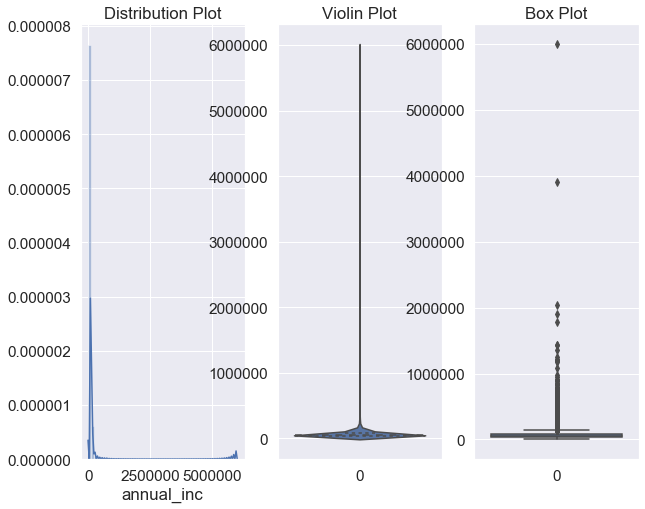

In [221]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(10,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loans_filter_DV["annual_inc"],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loans_filter_DV["annual_inc"],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loans_filter_DV["annual_inc"],ax=ax[2],orient='v')
plt.show()

tI seems on this feature ,there are outlier in this feature. so need to remove outlier 

In [222]:

loans_filter_DV["annual_inc"].describe()

count    4.235000e+04
mean     6.920405e+04
std      6.413285e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Max value is 2 decimal higher than 75% value. so remove outlier above 99/5%


In [223]:
q = loans_filter_DV["annual_inc"].quantile(0.995)
loans_filter_DV = loans_filter_DV[loans_filter_DV["annual_inc"] < q]
loans_filter_DV["annual_inc"].describe()

count     42092.000000
mean      66447.266534
std       37873.075414
min        1896.000000
25%       40000.000000
50%       58227.980000
75%       82000.000000
max      295000.000000
Name: annual_inc, dtype: float64

In [224]:
#Categoriacal Fetaure 
loans_filter_DV['loan_status'].value_counts()

Fully Paid                                             33346
Charged Off                                             5543
Does not meet the credit policy. Status:Fully Paid      1927
Does not meet the credit policy. Status:Charged Off      731
Current                                                  511
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

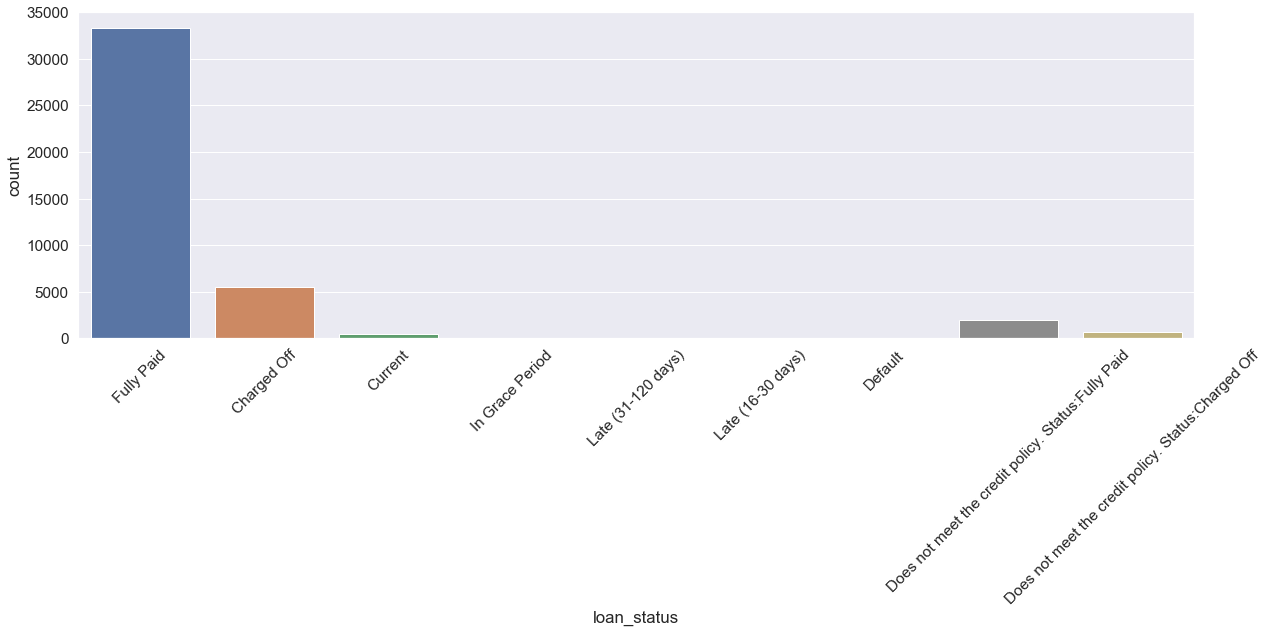

In [225]:
plt.figure(figsize=(20,6))
sns.countplot(x='loan_status', data=loans_filter_DV)
plt.xticks(rotation=45)
plt.show()

In [226]:
loans_filter_DV1=loans_filter_DV[loans_filter_DV['loan_status']!= 'Current']
loans_filter_DV1a=loans_filter_DV1[loans_filter_DV['loan_status']!= 'Default']
loans_filter_DV2=loans_filter_DV1a[loans_filter_DV1['loan_status']!= 'In Grace Period']


C:\Users\PANDEYSU\.conda\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\PANDEYSU\.conda\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [227]:
loans_filter_DV2['loan_status'].value_counts()

Fully Paid                                             33346
Charged Off                                             5543
Does not meet the credit policy. Status:Fully Paid      1927
Does not meet the credit policy. Status:Charged Off      731
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Name: loan_status, dtype: int64

In [228]:
loan_status_map = {"loan_status":{ 
"Fully Paid": 0,
"Does not meet the credit policy. Status:Fully Paid": 0,
"Charged Off": 1,                                             
"Does not meet the credit policy. Status:Charged Off":1,
"Late (31-120 days)":1,                                
"Late (16-30 days)" :1   
}}
loans_filter_DV2 = loans_filter_DV2.replace(loan_status_map)

In [229]:
loans_filter_DV2['loan_status'].value_counts()

0    35273
1     6291
Name: loan_status, dtype: int64

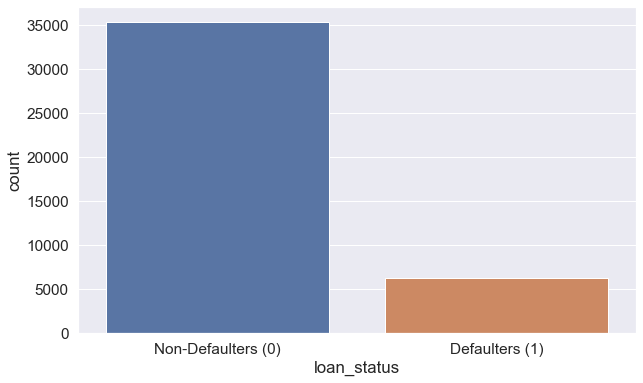

In [230]:
plt.figure(figsize=(10,6))
default = sns.countplot(x="loan_status", data=loans_filter_DV2)
default.set_xticklabels(['Non-Defaulters (0)','Defaulters (1)'])
plt.show()

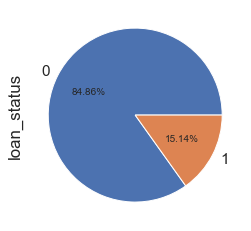

In [231]:
loans_filter_DV2.loan_status.value_counts().plot(x=None,y=None, kind='pie', autopct='%1.2f%%')


In [232]:
loans_filter_DV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41564 entries, 0 to 42349
Data columns (total 32 columns):
loan_amnt                  41564 non-null float64
funded_amnt                41564 non-null float64
funded_amnt_inv            41564 non-null float64
term                       41564 non-null object
int_rate                   41564 non-null float64
installment                41564 non-null float64
grade                      41564 non-null object
emp_length                 41564 non-null int64
home_ownership             41564 non-null int64
annual_inc                 41564 non-null float64
verification_status        41564 non-null int64
loan_status                41564 non-null int64
purpose                    41564 non-null object
dti                        41564 non-null float64
delinq_2yrs                41564 non-null float64
fico_range_low             41564 non-null float64
fico_range_high            41564 non-null float64
inq_last_6mths             41564 non-null float64
op

In [233]:
loans_filter_DV2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,delinq_amnt
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10,4,24000.0,...,9.0,5000.00,863.16,0.00,0.00,0.00,171.62,744.0,740.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,0,4,30000.0,...,4.0,456.46,435.17,0.00,117.08,1.11,119.66,499.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10,4,12252.0,...,10.0,2400.00,605.67,0.00,0.00,0.00,649.91,719.0,715.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10,4,49200.0,...,37.0,10000.00,2214.92,16.97,0.00,0.00,357.48,604.0,600.0,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,3,4,36000.0,...,12.0,5000.00,632.21,0.00,0.00,0.00,161.03,679.0,675.0,0.0


In [234]:
numerical = {'loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment','annual_inc','open_acc', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee'}

In [235]:
corr_matrix = loans_filter_DV2[numerical].corr()

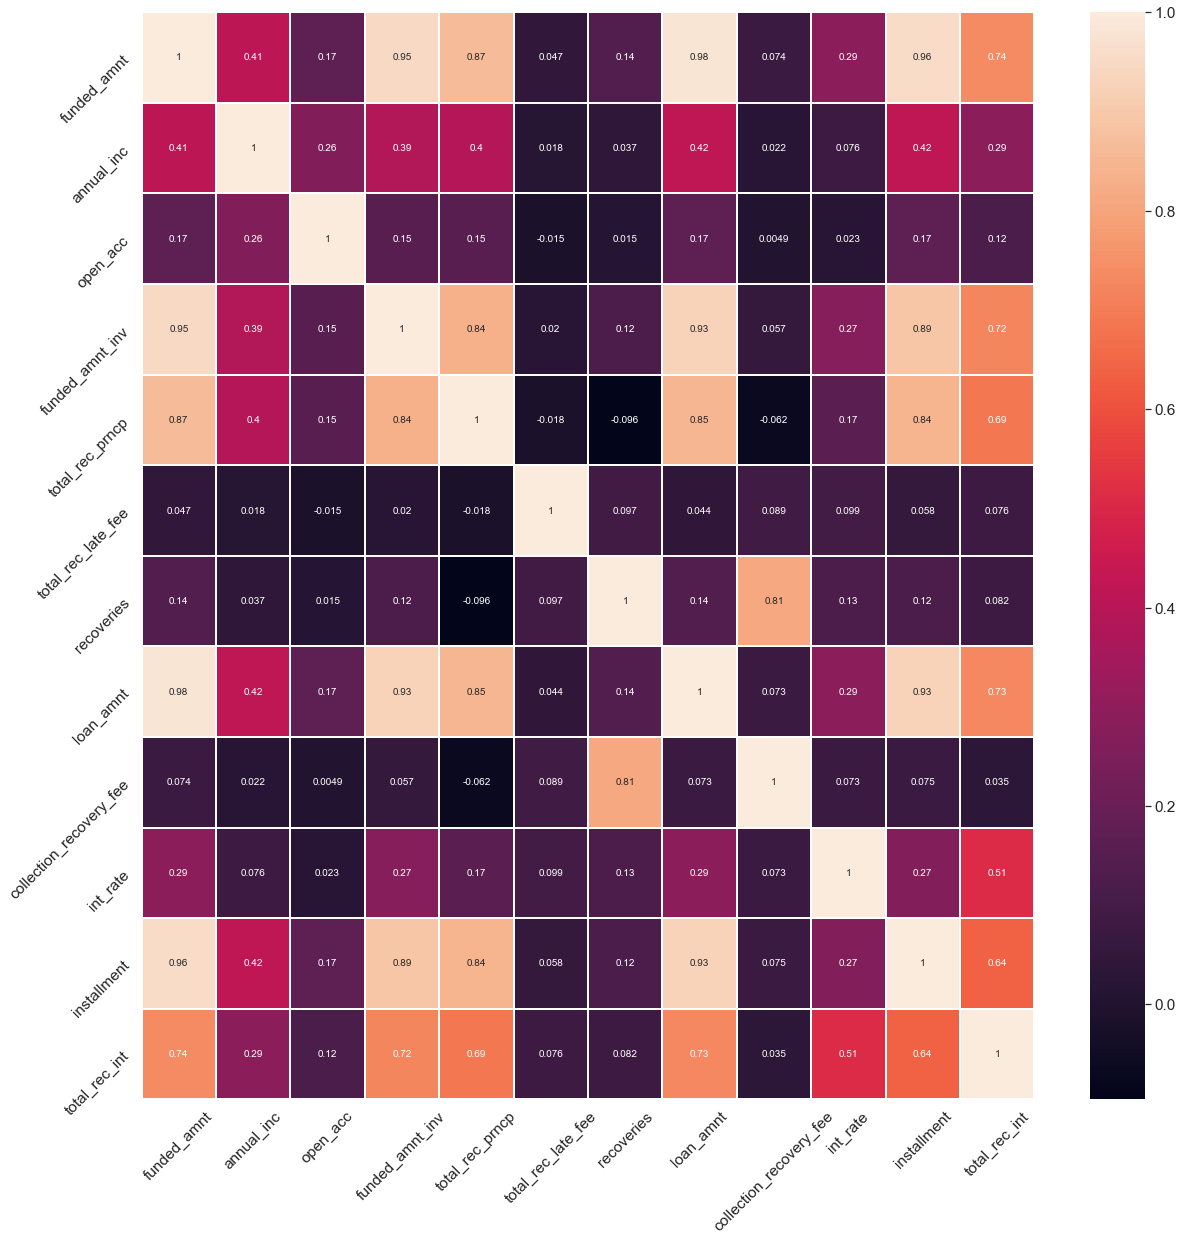

In [236]:
# Plot heatmap
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, xticklabels=True, yticklabels=True, linewidths=0.9, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Figure size 5760x2880 with 0 Axes>

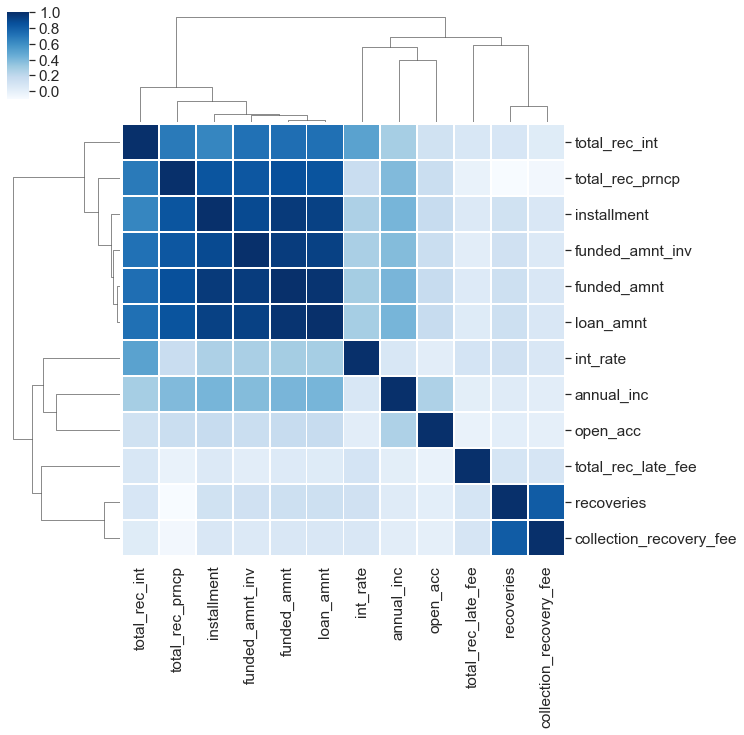

In [237]:
plt.figure(figsize = (80,40))
sns.set(font_scale=1.4)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, sep=15)
sns.clustermap(data=corr_matrix, annot=False, cmap="Blues", linewidths=0.9)

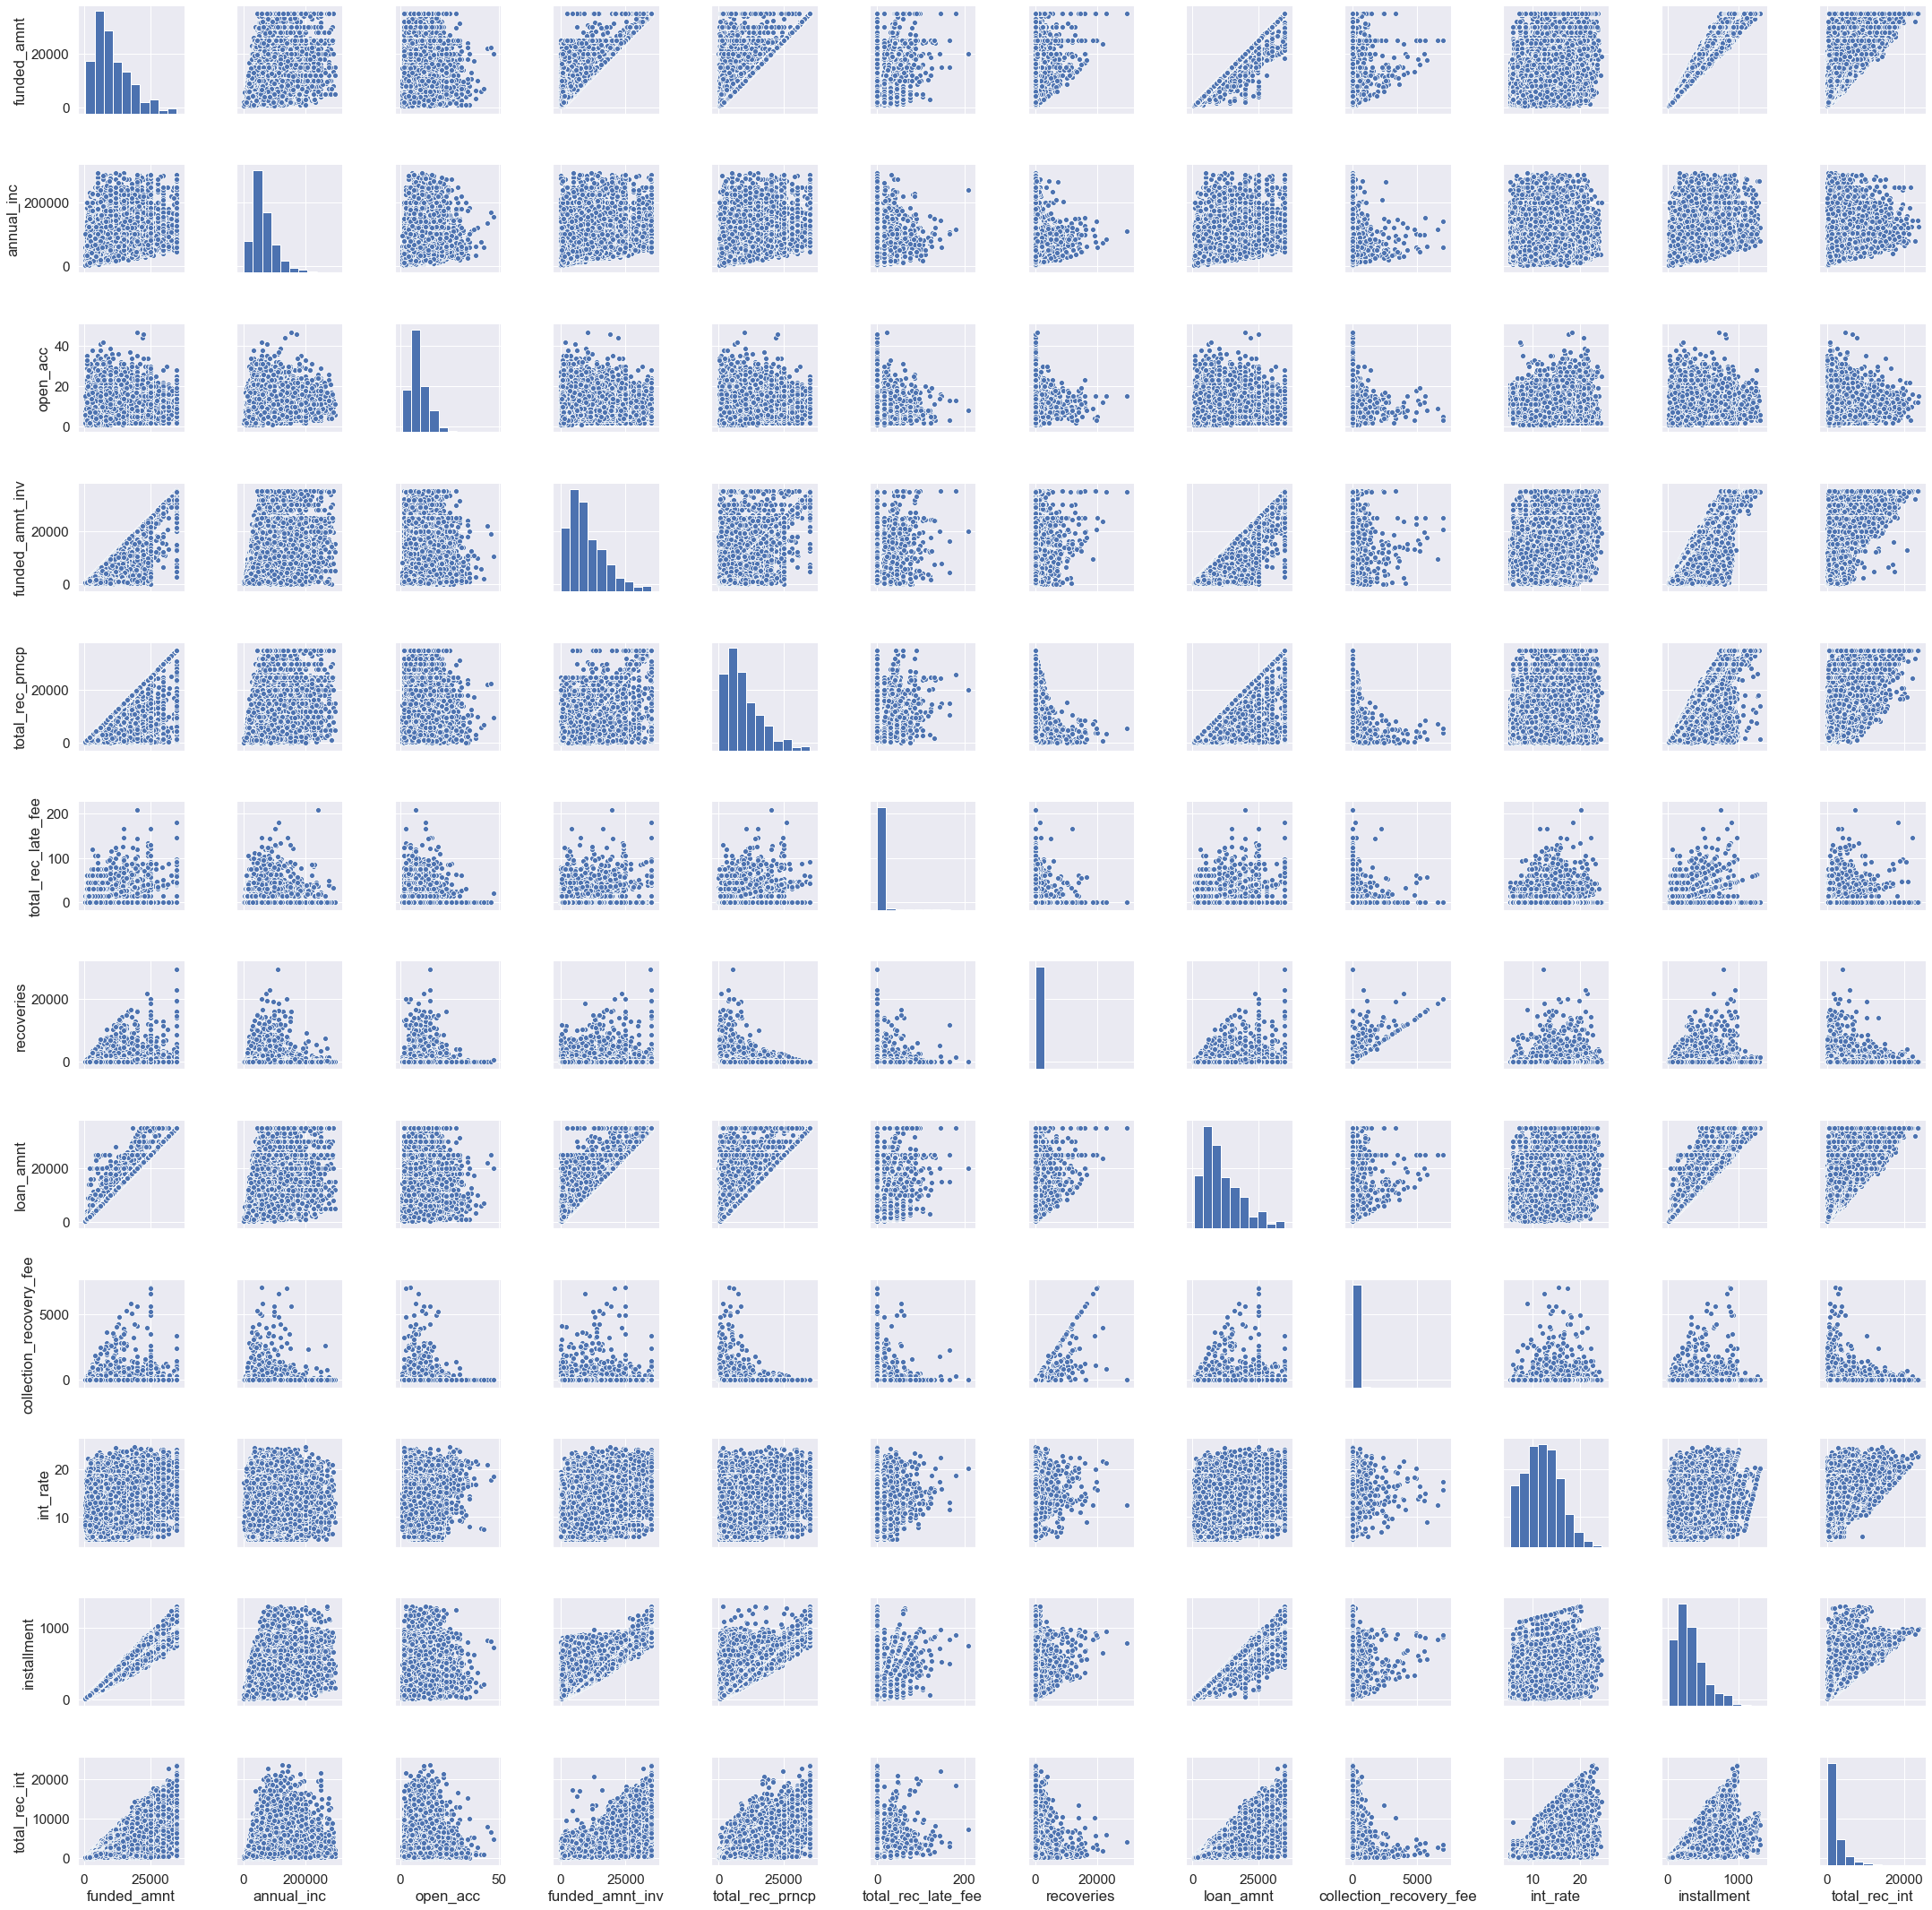

In [238]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(loans_filter_DV2[numerical])

In [241]:
drop_cols= { 'total_rec_prncp','funded_amnt','funded_amnt_inv','collection_recovery_fee','total_rec_prncp','recoveries','last_fico_range_low','last_fico_range_high'}

In [242]:
loans_filter_DV2 = loans_filter_DV2.drop(drop_cols,axis=1)

In [243]:
loans_filter_DV2['fico_average'] = (loans_filter_DV2['fico_range_high'] + loans_filter_DV2['fico_range_low']) / 2

In [244]:
loans_filter_DV2 = loans_filter_DV2.drop(['fico_range_high','fico_range_low'],axis=1)

In [245]:
loans_filter_DV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41564 entries, 0 to 42349
Data columns (total 24 columns):
loan_amnt              41564 non-null float64
term                   41564 non-null object
int_rate               41564 non-null float64
installment            41564 non-null float64
grade                  41564 non-null object
emp_length             41564 non-null int64
home_ownership         41564 non-null int64
annual_inc             41564 non-null float64
verification_status    41564 non-null int64
loan_status            41564 non-null int64
purpose                41564 non-null object
dti                    41564 non-null float64
delinq_2yrs            41564 non-null float64
inq_last_6mths         41564 non-null float64
open_acc               41564 non-null float64
pub_rec                41564 non-null float64
revol_bal              41564 non-null float64
revol_util             41564 non-null float64
total_acc              41564 non-null float64
total_rec_int          41564

2.2. Quantitative–Categorical

In [246]:
loans_filter_DV2['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

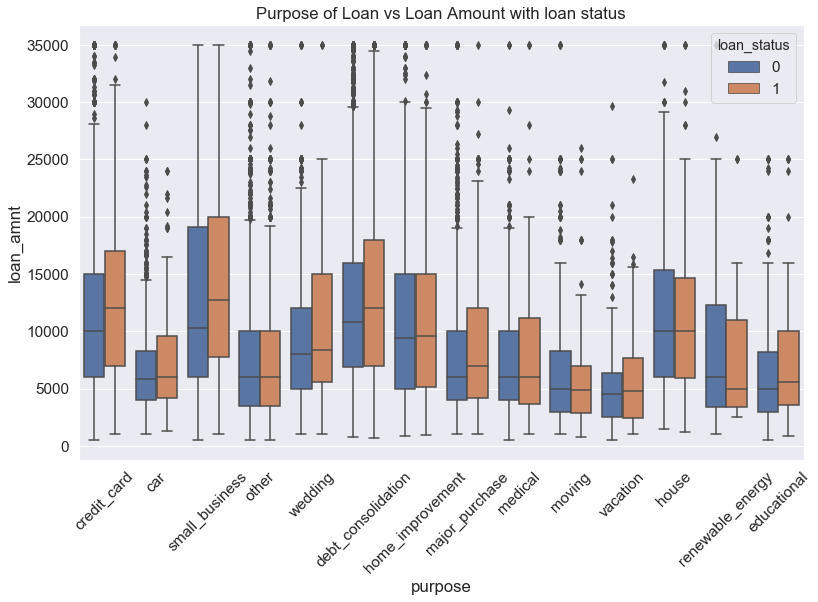

In [247]:
plt.figure(figsize=(13,8))
sns.boxplot(data =loans_filter_DV2, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount with loan status')
plt.xticks(rotation=45)
plt.show()

We can observe from avove grapgh that wedding amd major purchase are more towords defaliter 

In [248]:
# function to plaot count plot 
def countplots(df,col,hue=None):     
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loans_filter_DV2))), (p.get_x()+0.05, p.get_height()+20))  
    del temp
    plt.show()

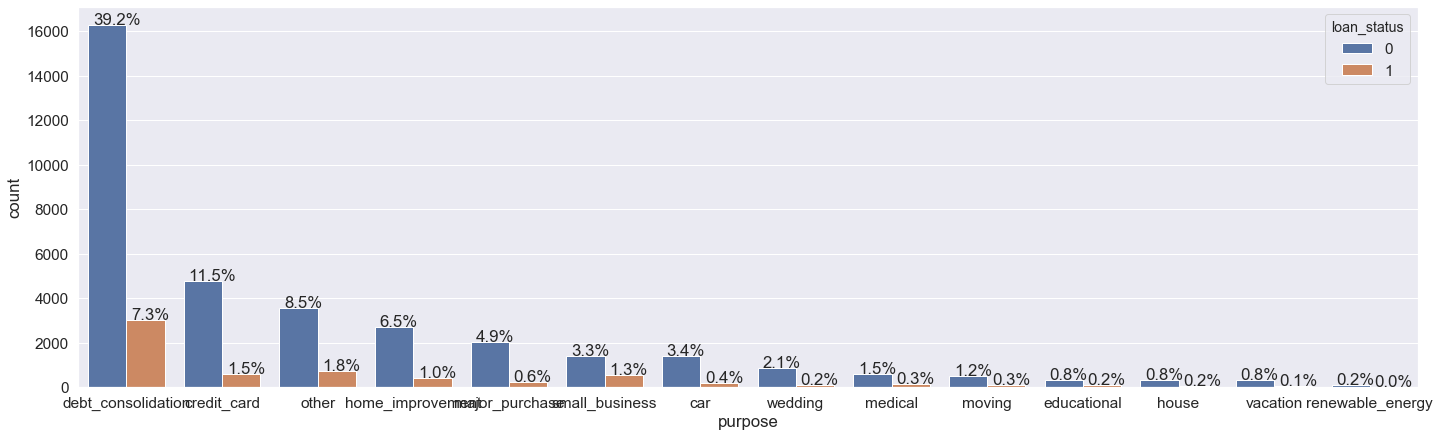

In [249]:
countplots(loans_filter_DV2, 'purpose', hue='loan_status')


We can see that 46.5 % loans were to repay the previous debt and defaulter percentage is more

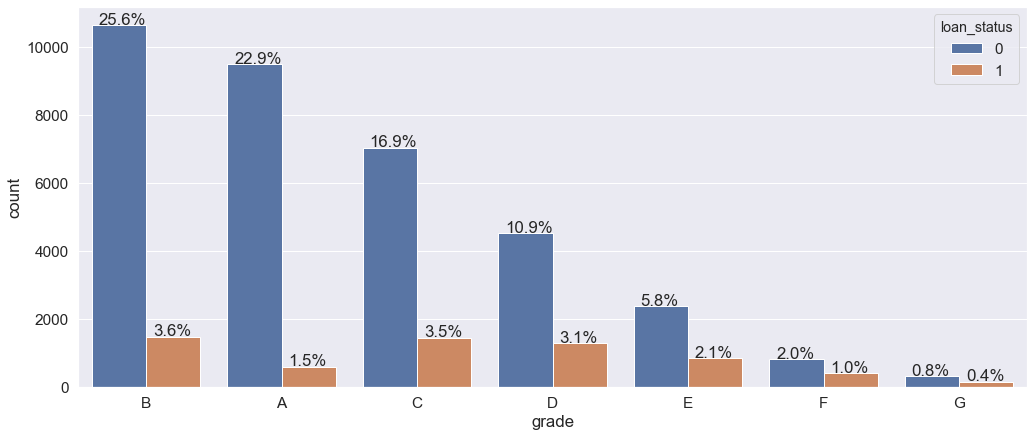

In [250]:
countplots(loans_filter_DV2, 'grade', hue='loan_status')

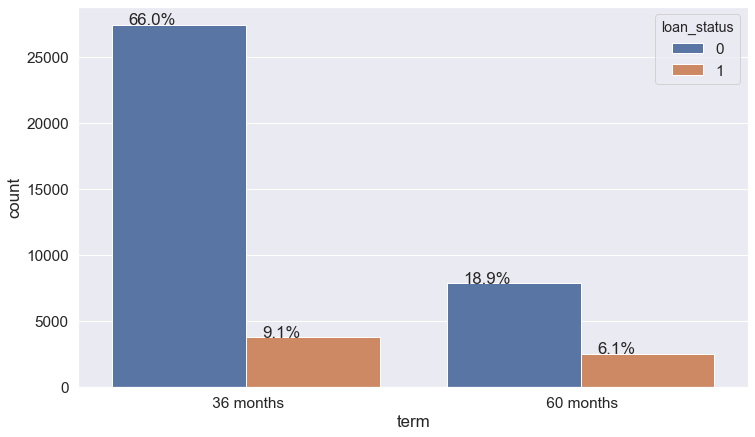

In [251]:
countplots(loans_filter_DV2, 'term', hue='loan_status')

We can observer from above graph defaulter percentage are more in 60 months loan term

In [252]:
def countplots1(df,col,hue=None):     
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    fig.set_size_inches(30 , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loans_filter_DV2))), (p.get_x()+0.05, p.get_height()+20))  
    del temp
    plt.show()

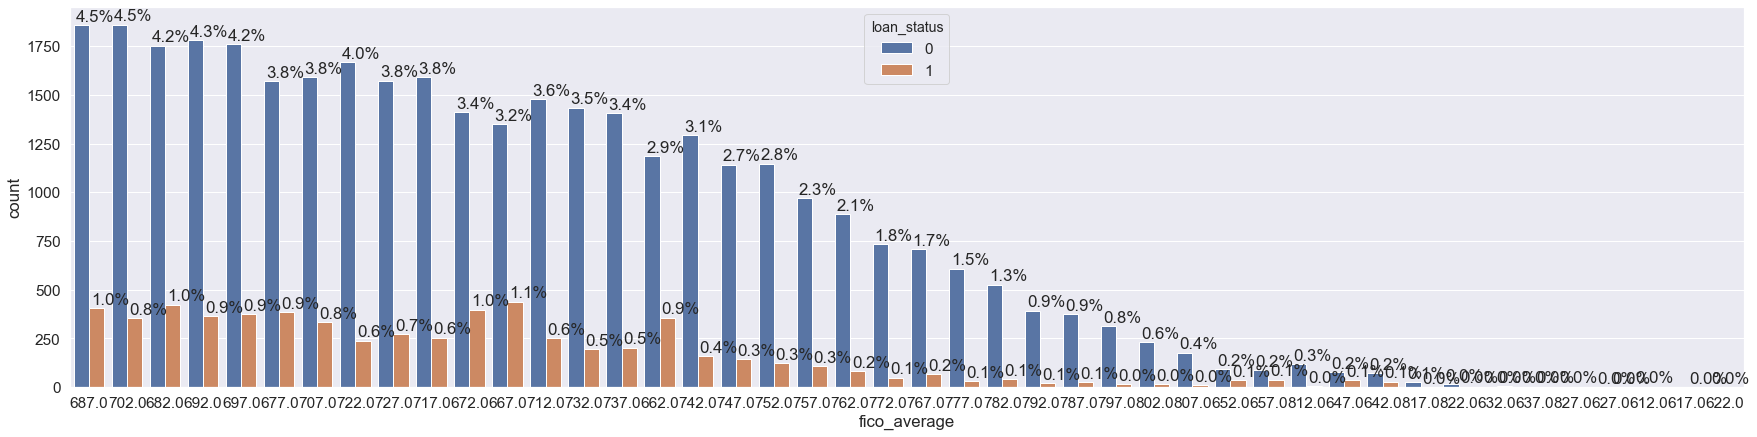

In [253]:
countplots1(loans_filter_DV2, 'fico_average', hue='loan_status')

We can observe fico average between 640 to 680  are more probable of being defaulters.

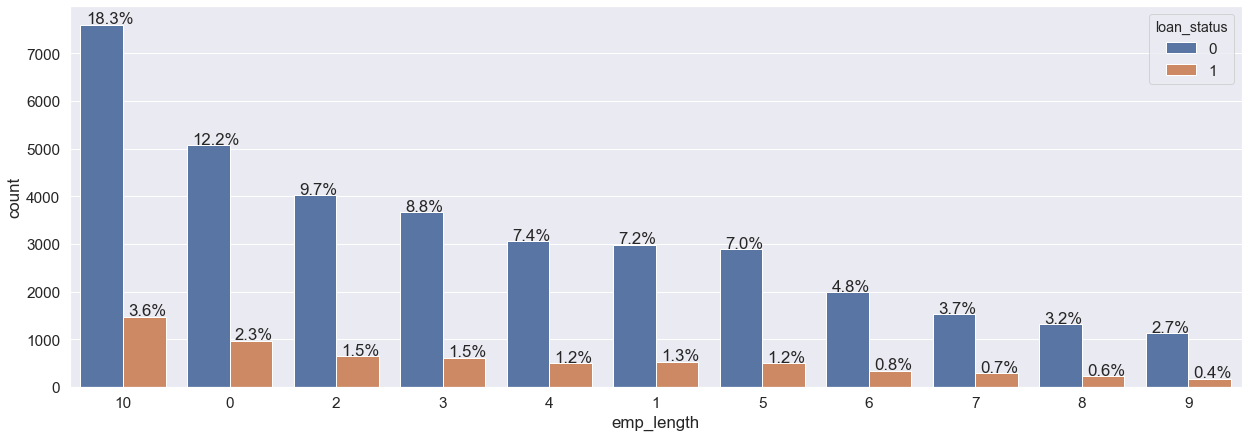

In [254]:
countplots(loans_filter_DV2, 'emp_length', hue='loan_status')

We can observe employment length between 5-9 years are more probable of being defaulters.

<b>Conclusion:</b>
- Our target variable is: <i>Loan_status.</i>

- Some of the most important features to consider are:

<li>Emp_Length;
term;
loan_amnt;
grade;
int_rate;
purpose;
annual_inc;</li>

In [255]:
loans_filter_DV2['term'] = loans_filter_DV2['term'].str.split(' ').str[1]

In [256]:
map_dict1={
"grade":{
"A": 6,
"B": 5,
"C": 4,
"D": 3,
"E": 2,
"F": 1,
"G": 0
},
"purpose":{
"debt_consolidation":13,
"credit_card":12,
"home_improvement":11,
"other":10,
"major_purchase":9,
"small_business":8,
"car":7,
"medical":6,
"moving":5,
"vacation":4,
"house":3,
"wedding":2,
"renewable_energy":1,
"educational":0
},
"term":{
"36":0,
"60":1    
}    
}

In [257]:
loans_filter_DV2=loans_filter_DV2.replace(map_dict1)

In [258]:
loans_filter_DV2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41564 entries, 0 to 42349
Data columns (total 24 columns):
loan_amnt              41564 non-null float64
term                   41564 non-null int64
int_rate               41564 non-null float64
installment            41564 non-null float64
grade                  41564 non-null int64
emp_length             41564 non-null int64
home_ownership         41564 non-null int64
annual_inc             41564 non-null float64
verification_status    41564 non-null int64
loan_status            41564 non-null int64
purpose                41564 non-null int64
dti                    41564 non-null float64
delinq_2yrs            41564 non-null float64
inq_last_6mths         41564 non-null float64
open_acc               41564 non-null float64
pub_rec                41564 non-null float64
revol_bal              41564 non-null float64
revol_util             41564 non-null float64
total_acc              41564 non-null float64
total_rec_int          41564 no

In [260]:
loans_filter_DV2.to_csv('data/filterDV_loans.csv',index=False)